In [1]:
import numpy as np
from PIL import Image
from tqdm import tqdm
from matplotlib import pyplot as plt

from run import DATASET_PATHS, load_lfw_pairs, load_caplfw_pairs

In [ ]:
pairs = load_lfw_pairs(*DATASET_PATHS['LFW'])

heights = []
widths = []

for (img1, img2, _) in tqdm(pairs):
    img1 = Image.open(img1).convert('RGB')
    heights.append(img1.height)
    widths.append(img1.width)

    img2 = Image.open(img2).convert('RGB')
    heights.append(img2.height)
    widths.append(img2.width)

plt.hist(heights, bins=100)
plt.hist(widths, bins=100)
plt.show()

print(np.unique(heights), np.unique(widths))

In [ ]:
x = open(pairs[0][0], "rb")

In [ ]:
y = np.array(Image.open(x))

In [ ]:
plt.imshow(y)

In [ ]:
pairs = load_caplfw_pairs(*DATASET_PATHS['CA-LFW'])

heights = []
widths = []

for (img1, img2, _) in tqdm(pairs):
    img1 = Image.open(img1).convert('RGB')
    heights.append(img1.height)
    widths.append(img1.width)

    img2 = Image.open(img2).convert('RGB')
    heights.append(img2.height)
    widths.append(img2.width)

plt.hist(heights, bins=100)
plt.hist(widths, bins=100)
plt.show()

print(np.unique(heights), np.unique(widths))

In [2]:
pairs = load_caplfw_pairs(*DATASET_PATHS['CP-LFW'])

# heights = []
# widths = []
#
# for (img1, img2, _) in tqdm(pairs):
#     img1 = Image.open(img1).convert('RGB')
#     heights.append(img1.height)
#     widths.append(img1.width)
#
#     img2 = Image.open(img2).convert('RGB')
#     heights.append(img2.height)
#     widths.append(img2.width)
#
# plt.hist(heights, bins=100)
# plt.hist(widths, bins=100)
# plt.show()
#
# print(np.unique(heights), np.unique(widths))

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /home/naeem-md93/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvide

 11%|█         | 667/6000 [00:50<05:55, 15.00it/s]

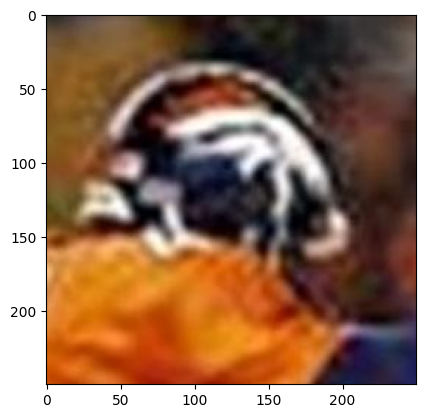

 11%|█         | 668/6000 [00:50<06:42, 13.24it/s]


In [20]:
from insightface.app import FaceAnalysis

model1 = FaceAnalysis(model="buffalo_l")
model1.prepare(ctx_id=0, det_size=(256, 256), det_thresh=0.2)

model2 = FaceAnalysis(model="buffalo_s")
model2.prepare(ctx_id=0, det_size=(256, 256), det_thresh=0.2)

for (img1, img2, _) in tqdm(pairs):
    img1 = np.array(Image.open(img1).convert('RGB'))
    img2 = np.array(Image.open(img2).convert('RGB'))

    faces1 = model1.get(img1)
    faces2 = model2.get(img2)

    # assert len(faces1) in (0, 1), f"{len(faces1)}"
    # assert len(faces2) in (0, 1), f"{len(faces2)}"

    if len(faces1) == 0:
        plt.imshow(img1)
        plt.show()
        break

    if len(faces2) == 0:
        plt.imshow(img2)
        plt.show()
        break
